# Assignment 1

During this first assignment you will create your own dataset, implement and perform linear regression and investigate its results with different datasets.

1. Create datasets, set noise, add outliers, create large/small set
2. Perform Least squares with SK learn
3. Implement least squares manually
4. Bonus

Publish your notebook to Machine Learning repository on Github.

### Deadline 28 September 23:59

Do not hand in any other files, the Notebook should contain all your answers.

In [295]:
%pylab inline 
global theta0
global theta1
global alpha

theta0 = 1
theta1 = 0.5
alpha = 0.1

Populating the interactive namespace from numpy and matplotlib


# Creating the dataset

In order to create the dataset we will use the [scikit-learn](http://scikit-learn.org/) toolkit (install first!). Specifically the [make_regression](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function, which generates a dataset that is a good target for regression.

## Problem 1
Create several different datasets. Vary their sizes, levels of noise and add some outliers.

It is only necessary to create them (you can visualize them for yourself, but you don't need to hand this in). You are going to use them in the next problem.

Populating the interactive namespace from numpy and matplotlib


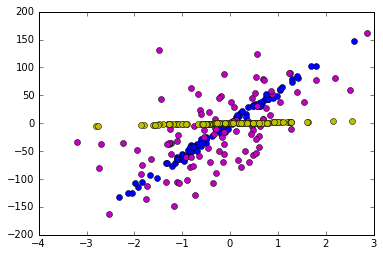

In [296]:
%pylab inline

from sklearn.datasets import make_regression

noise = 5 #Standard deviation of added Gaussian noise
n_samples = 100 #Size of the dataset
n_dimensions = 1 #We are doing univariate regression, so leave this at 1
(x1,y1) = make_regression(n_samples=n_samples, n_features=n_dimensions, noise=noise)
(x1_test,y1_test) = make_regression(n_samples=50, n_features=n_dimensions, noise=noise)
plt.plot(x1,y1,'o', color = 'b')
#plt.show()

############### More DATASETS

#Increased noise
(x2,y2) = make_regression(n_samples=100, n_features=n_dimensions, noise=50)
(x2_test,y2_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=50)
plt.plot(x2,y2,'o', color = 'm')
#plt.show()

#Decreased noise
(x3,y3) = make_regression(n_samples=100, n_features=n_dimensions, noise=.01)
(x3_test,y3_test) = make_regression(n_samples=100, n_features=n_dimensions, noise=.01)
plt.plot(x3,y3,'o', color = 'y')





# Perform Linear Regression

Scikit-learn has an implementation of [Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Below you see an example of how to use it.

## Problem 2
Use the scikit-learn method to fit your own datasets. What is the effect on the score of varying the amount of noise?

0.785314174161


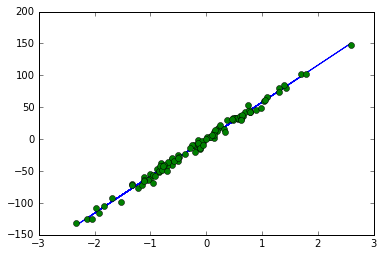

In [297]:
from sklearn.linear_model import LinearRegression

#The regression object
#this code constructs a local version of linear regression
regr = LinearRegression()

#Fit the regression object on the data
regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

## Your analysis


The higher the noise (or the more data is spread out), the lower the absolute value of the regression score.

-0.648298966479


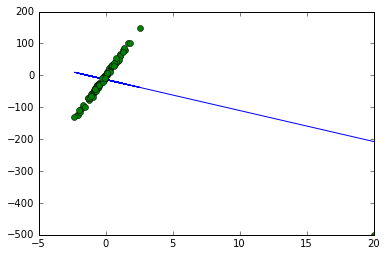

In [298]:
#Add a serious outlier and see what happens

#Example of creating big outlier:
x1[-1] = 20 #negative indices begin at the end. So this changes the last values of x1 and y1
y1[-1] = -500

#Create a plot that shows how the prediction can be very wrong in the presence of a serious outlier.


regr.fit(x1,y1)

#Print the score that the fit has
print regr.score(x1_test,y1_test)

#Plot the resulting line
plt.plot(x1,regr.predict(x1))
plt.plot(x1,y1,'o')
plt.show()

## Problem 3: Implement Linear regression

In class you looked at performing regression using gradient descent. Now you are going to implement it.

Make sure to comment your code!

In [299]:
#Make a prediction function h
def prediction_function(x,theta0,theta1):
    #m = 4
    h = np.add(theta0, np.multiply(theta1,x))  
    return h      #creates x_predict

print prediction_function(x1,0,1)    #creates a column 

[[ -1.00393005e+00]
 [ -1.72729356e-01]
 [ -1.22290122e+00]
 [  5.23891612e-01]
 [ -8.88254254e-01]
 [  7.88388453e-01]
 [ -1.00507515e+00]
 [ -1.32938047e+00]
 [ -9.60527747e-01]
 [ -6.10475310e-01]
 [ -6.16705499e-01]
 [  1.08729037e+00]
 [  2.16001994e-01]
 [  5.17556232e-01]
 [  3.29541732e-01]
 [  1.92637470e-01]
 [ -6.06328852e-01]
 [ -1.11509252e+00]
 [  6.43594821e-02]
 [  1.34430610e-01]
 [  6.65979677e-01]
 [ -1.03746021e+00]
 [ -8.39672230e-01]
 [ -2.14169726e+00]
 [  2.47641009e-01]
 [ -1.83211831e+00]
 [  1.55759414e-01]
 [  1.04040466e+00]
 [ -5.07304761e-01]
 [ -7.03025573e-01]
 [ -2.04144529e+00]
 [ -4.92749177e-01]
 [ -1.11399740e+00]
 [ -8.13700367e-01]
 [  1.29814414e+00]
 [ -6.86550668e-01]
 [  4.79441387e-01]
 [ -6.38262489e-02]
 [ -8.80238092e-02]
 [  3.30687148e-01]
 [  5.73589930e-01]
 [  1.42831461e+00]
 [  3.76907456e-01]
 [ -2.09124065e-01]
 [ -1.52683026e-01]
 [  7.93031980e-01]
 [ -1.92011017e+00]
 [ -9.16897711e-01]
 [ -4.97505743e-01]
 [  1.40045285e+00]


In [300]:
#Use the output of that function to compute the cost function J:
def cost_function(x_predict,y):   #h(x) - y
    #num_values = len(y)    # equals m
    #counter = 1
    #summation = 0
    #for i in range(1,num_values):
    #    hypothesis = prediction_function(x_predict[counter],theta0,theta1)
    #    loss = (hypothesis - y[counter])**2
    #    summation = summation + loss
    #    counter += 1
    #cost = (float(1)/float(2*num_values))*summation
    #newarray=ones([m,1])
    newarray = y.reshape(100,1)
    loss = np.subtract(x_predict,newarray)
    cost = dot(loss.T,loss)  #row*column = scalar
    return cost


print cost_function(prediction_function(x1,0,1),y1)

[[ 562502.30402009]]


In [301]:
#Create a function that returns the gradient values, given h (x_predict), y and x:
def compute_gradient(x_predict,y,x):
    global theta0
    global theta1
    theta0 = 0
    theta1 = 0
    #m = 4
    #num_values = len(y)    # equals m
    #counter = 1
    #for i in range(1,num_values):
    #    hypothesis = prediction_function(x_predict[counter],theta0,theta1)
    #    loss = (hypothesis - y[counter])
    #    theta0 = theta0 - (alpha/float(num_values))*(np.sum(loss))
    #    theta1 = theta1 - ((alpha/float(num_values))*(np.sum(loss))*(x[counter]))
    #    counter += 1
    theta0 = theta0 - (alpha/m)*dot((x_predict-y.reshape((100,1))).T,ones([m,1]))   #dot product of column transposed (row) and row transposed (column) equals scalar
    theta1 = theta1 - (alpha/m)*dot((x_predict-y.reshape((100,1))).T,x)   #dot product of column transposed (row) and column = scalar
    return float(theta0), float(theta1)

print compute_gradient(prediction_function(x1,theta0,theta1),y1,x1)

(-1.4569726277777582, -5.076118946555642)


[5069.752240883345, 49198.469489878466, 691948.8937227221, 10666585.275760572, 162981347.4018737, 2498395724.427534, 38269457574.642044, 586313773200.7583, 8982264769720.422, 137609128965206.06, 2108177624017302.8, 3.2297396926726668e+16, 4.947977867843496e+17, 7.580328033801077e+18, 1.1613102124366723e+20, 1.7791333150268302e+21, 2.725641534726888e+22, 4.175697073867863e+23, 6.397189736619714e+24, 9.800528104169865e+25, 1.501446026689201e+27, 2.3002231584886612e+28, 3.523953898305159e+29, 5.398715786141471e+30, 8.27086079461779e+31, 1.2671001955603465e+33, 1.9412041206567787e+34, 2.973934856342143e+35, 4.5560837398049734e+36, 6.979944096572077e+37, 1.0693310828689222e+39, 1.6382208065981374e+40, 2.5097628360065407e+41, 3.844969779183585e+42, 5.890513793071619e+43, 9.024297911057845e+44, 1.3825271554971958e+46, 2.1180388264277862e+47, 3.244846549608834e+48, 4.971121869501453e+49, 7.615784679991921e+50, 1.16674219249862e+52, 1.7874551355592309e+53, 2.7383906077784585e+54, 4.195228720201

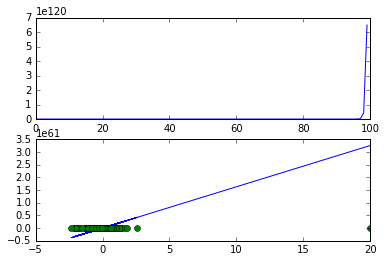

In [302]:
#These are some default parameters, see how playing with them affects the behavior
alpha = 0.8
theta0 = 0
theta1 = 1
x = x1 
y = y1 
iterations = 100
#Fill in the stopcondition yourself
stopcondition = 0
x_predict = prediction_function(x,theta0,theta1)   #initial hypothesis based on given values
i = 0
cost = 10
m=len(x)
cost_list = []
    
#Try to save the output of the cost function at each iteration and plot it at the end
while (i < iterations) and (cost > stopcondition):
    i = i +1
    #Put everything together here
    [theta0,theta1] = compute_gradient(x_predict,y,x)    #ith iteration changes the theta values
    x_predict = prediction_function(x,theta0,theta1)     #change hypothesis based on new theta values
    cost = cost_function(x_predict,y)            #compute cost based on new hypothesis
    cost_list.append(float(cost/(2*m)))
    
    
print cost_list
plt.figure(1)
plt.subplot(211)
plt.plot(cost_list) 

plt.subplot(212)
plt.plot(x,prediction_function(x1,theta0,theta1))
plt.plot(x,y,'o')
plt.show()

## Problem 4

Write a short analysis about the amount of iterations necessary to obtain a good result, the influence of the learning rate and the trend of the cost function. 

Assuming that we do not consider the extreme outliers (20,-500) in the dataset, the learning rate influences the number of iterations necessary to obtain a good result. If it's too large, then it would require more iterations for gradient descent to converge because of possible overshooting. This overshooting behavior is apparent in the trend of the cost function as well. 
Implementing an appropriate learning rate would allow gradient descent to converge quickly.

# Bonus Problem: Implement Least Squares with closed form solution

For the Least Squares method there is also a closed-form solution.

$\theta_1$ can be found by:
$$ \boldsymbol{\hat\theta_1} =( X ^TX)^{-1}X^{T}\boldsymbol y $$

You can leave $\theta_0$ to be 0. Make a plot with your data as dots and your prediction as a line.

In [303]:
print x1  #everything here is used as a testing space for problem 3

[[ -1.00393005e+00]
 [ -1.72729356e-01]
 [ -1.22290122e+00]
 [  5.23891612e-01]
 [ -8.88254254e-01]
 [  7.88388453e-01]
 [ -1.00507515e+00]
 [ -1.32938047e+00]
 [ -9.60527747e-01]
 [ -6.10475310e-01]
 [ -6.16705499e-01]
 [  1.08729037e+00]
 [  2.16001994e-01]
 [  5.17556232e-01]
 [  3.29541732e-01]
 [  1.92637470e-01]
 [ -6.06328852e-01]
 [ -1.11509252e+00]
 [  6.43594821e-02]
 [  1.34430610e-01]
 [  6.65979677e-01]
 [ -1.03746021e+00]
 [ -8.39672230e-01]
 [ -2.14169726e+00]
 [  2.47641009e-01]
 [ -1.83211831e+00]
 [  1.55759414e-01]
 [  1.04040466e+00]
 [ -5.07304761e-01]
 [ -7.03025573e-01]
 [ -2.04144529e+00]
 [ -4.92749177e-01]
 [ -1.11399740e+00]
 [ -8.13700367e-01]
 [  1.29814414e+00]
 [ -6.86550668e-01]
 [  4.79441387e-01]
 [ -6.38262489e-02]
 [ -8.80238092e-02]
 [  3.30687148e-01]
 [  5.73589930e-01]
 [  1.42831461e+00]
 [  3.76907456e-01]
 [ -2.09124065e-01]
 [ -1.52683026e-01]
 [  7.93031980e-01]
 [ -1.92011017e+00]
 [ -9.16897711e-01]
 [ -4.97505743e-01]
 [  1.40045285e+00]


In [304]:
print matrix(y1)

[[ -54.33349653  -12.51659997  -77.31934109   32.882513    -47.39648879
    42.61892388  -62.14308612  -70.98235875  -56.24646828  -31.73872032
   -29.13436241   65.5454571    18.208313     33.54188311   15.79399478
    13.11257933  -40.56615559  -59.8355871     3.82774842   11.31328815
    36.05563242  -64.39474826  -51.73798621 -125.62221062   22.08521404
  -104.9923131    14.64229097   59.28008739  -25.16871984  -42.10267356
  -124.62748096  -28.32841942  -64.70392026  -38.19044326   79.81589494
   -36.49403694   32.37609467   -5.13923268   -5.31039733   11.14562296
    31.23998882   80.88824028   29.41735344   -9.53439523   -1.85561187
    42.51828143 -115.16080421  -57.99572942  -34.87284677   85.21491323
   -40.94630759  -50.16252013   -8.0515732     2.99909008   61.02951969
   -15.13147838  -71.54722625  -23.30722651  -92.05017288  147.45732452
    -2.96528264    2.10446977  -71.50838567   74.05955134    2.57860927
    32.91702602   -0.50883881   42.2805891   -35.02890047 -107.2

In [305]:
print dot(x1.T,y1.reshape((100,1)))

[[-4825.93850068]]


In [306]:
print prediction_function(x1, theta0, theta1)

[[ -1.61131574e+60]
 [ -2.57870639e+59]
 [ -1.96786678e+60]
 [  8.76438138e+59]
 [ -1.42296071e+60]
 [  1.30711867e+60]
 [ -1.61318032e+60]
 [ -2.14124707e+60]
 [ -1.54064373e+60]
 [ -9.70652913e+59]
 [ -9.80797536e+59]
 [  1.79382103e+60]
 [  3.75101097e+59]
 [  8.66122231e+59]
 [  5.59977991e+59]
 [  3.37056613e+59]
 [ -9.63901229e+59]
 [ -1.79232174e+60]
 [  1.28181408e+59]
 [  2.42278311e+59]
 [  1.10780031e+60]
 [ -1.66591295e+60]
 [ -1.34385454e+60]
 [ -3.46394350e+60]
 [  4.26618944e+59]
 [ -2.95985570e+60]
 [  2.77008029e+59]
 [  1.71747696e+60]
 [ -8.02660182e+59]
 [ -1.12135262e+60]
 [ -3.30070308e+60]
 [ -7.78959305e+59]
 [ -1.79053856e+60]
 [ -1.30156452e+60]
 [  2.13715447e+60]
 [ -1.09452651e+60]
 [  8.04059784e+59]
 [ -8.05435753e+58]
 [ -1.19944492e+59]
 [  5.61843072e+59]
 [  9.57361970e+59]
 [  2.34911122e+60]
 [  6.37103657e+59]
 [ -3.17132188e+59]
 [ -2.25229175e+59]
 [  1.31467973e+60]
 [ -3.10313296e+60]
 [ -1.46960088e+60]
 [ -7.86704428e+59]
 [  2.30374387e+60]


In [308]:
print np.array(prediction_function([0,1,2,3],0,1))

[0 1 2 3]


In [309]:
print np.array([2,2,1,3])

[2 2 1 3]


In [310]:
print x

[[ -1.00393005e+00]
 [ -1.72729356e-01]
 [ -1.22290122e+00]
 [  5.23891612e-01]
 [ -8.88254254e-01]
 [  7.88388453e-01]
 [ -1.00507515e+00]
 [ -1.32938047e+00]
 [ -9.60527747e-01]
 [ -6.10475310e-01]
 [ -6.16705499e-01]
 [  1.08729037e+00]
 [  2.16001994e-01]
 [  5.17556232e-01]
 [  3.29541732e-01]
 [  1.92637470e-01]
 [ -6.06328852e-01]
 [ -1.11509252e+00]
 [  6.43594821e-02]
 [  1.34430610e-01]
 [  6.65979677e-01]
 [ -1.03746021e+00]
 [ -8.39672230e-01]
 [ -2.14169726e+00]
 [  2.47641009e-01]
 [ -1.83211831e+00]
 [  1.55759414e-01]
 [  1.04040466e+00]
 [ -5.07304761e-01]
 [ -7.03025573e-01]
 [ -2.04144529e+00]
 [ -4.92749177e-01]
 [ -1.11399740e+00]
 [ -8.13700367e-01]
 [  1.29814414e+00]
 [ -6.86550668e-01]
 [  4.79441387e-01]
 [ -6.38262489e-02]
 [ -8.80238092e-02]
 [  3.30687148e-01]
 [  5.73589930e-01]
 [  1.42831461e+00]
 [  3.76907456e-01]
 [ -2.09124065e-01]
 [ -1.52683026e-01]
 [  7.93031980e-01]
 [ -1.92011017e+00]
 [ -9.16897711e-01]
 [ -4.97505743e-01]
 [  1.40045285e+00]


In [311]:
print len(x1)

100
